In [13]:
import astropy.io.fits as fits
import pickle
from astropy.visualization import ImageNormalize, AsinhStretch
import numpy as np
import matplotlib.pyplot as plt
from analysis_utils import plot_2D_map
from astropy.wcs import WCS

In [3]:
prefix = "/raid/work/yamato/eDisk_data/L1489IRS/v0_images/continuum/L1489IRS_SBLB_continuum_"
ext = ".pbcor.tt0.fits"
robust = [-2.0, -1.0, 0.0, 0.5, 1.0, 2.0]
uvtaper = ['1000klambda', '2000klambda', '3000klambda']

In [5]:
statfile = "./L1489IRS_cont_statistics.pkl"
with open(statfile, 'rb') as f:
    stat = pickle.load(f)

['robust_-2.0', 'robust_-1.0', 'robust_0.0', 'robust_0.5', 'robust_1.0', 'robust_2.0']


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


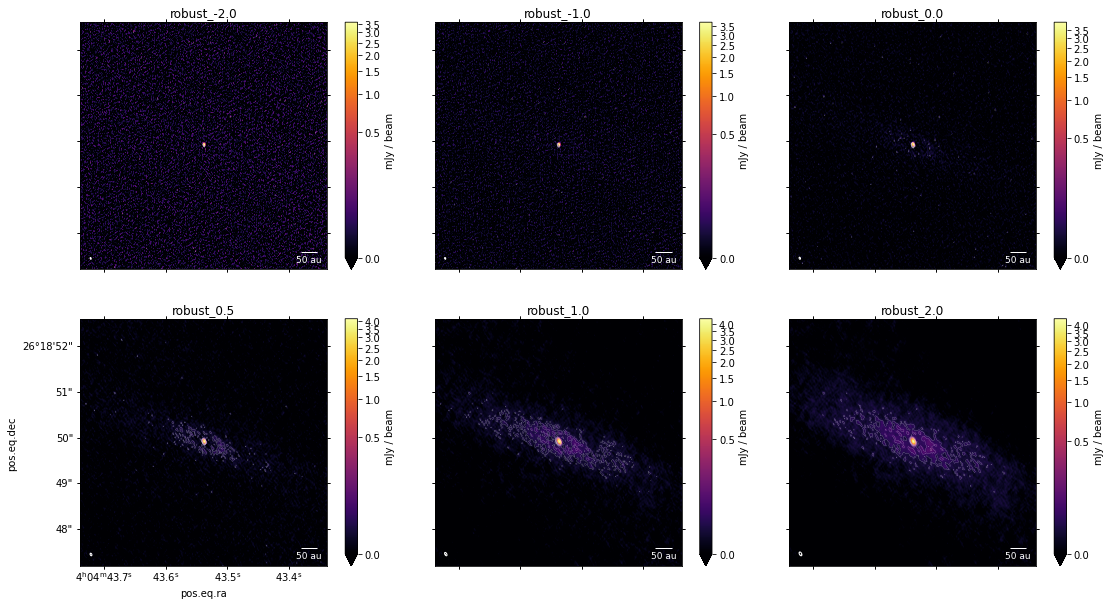

In [19]:
imaging_params = stat.index.values.tolist()
print(imaging_params[:6])

fig = plt.figure(figsize=(18, 10))
for i, imaging_param_str in enumerate(imaging_params[:6]): # only for robust
    imagepath = prefix + imaging_param_str + ext
    header = fits.getheader(imagepath)
    beam = (header['BMAJ']/np.abs(header['CDELT1']), header['BMIN']/np.abs(header['CDELT1']), 90+header['BPA'])
    scale = (50 / 140 / 3600 / header['CDELT1'], '50 au')
    data = fits.getdata(imagepath)[2100:3900,2100:3900] * 1e3 # to mJy
    norm = ImageNormalize(data, vmin=0.0, stretch=AsinhStretch(a=0.03))
    levels = np.array([3, 5, 7, 10, 15, 20, 30, 50, 100, 150, 200]) * stat.at[imaging_param_str, 'rms [mJy / beam]']
    imshow_kw = {'norm': norm, 'cmap': 'inferno'}
    contour_kw = {'levels': levels, "colors": "white", "linewidths": 0.2, "linestyles": "dashed"}
    ax = fig.add_subplot(2, 3, i+1, projection=WCS(header))
    #fig, ax = plt.subplots(subplot_kw={'projection': WCS(header)})
    plot_2D_map(data, ax=ax, beam=beam, scale=scale, imshow_kw=imshow_kw, contour_kw=contour_kw, cbar_kw={'label': 'mJy / beam'})
    ax.set(title=imaging_param_str)
    if i != 3:
        ax.tick_params(axis="x", labelbottom=False)  # remove ticklabels for visual clarity
        ax.tick_params(axis="y", labelleft=False)


In [20]:
fig.savefig("./L1489IRS_continuum_gallery_robust.pdf", bbox_inches='tight', pad_inches=0.01)

['robust_1.0_taper_1000klambda', 'robust_1.0_taper_2000klambda', 'robust_1.0_taper_3000klambda', 'robust_2.0_taper_1000klambda', 'robust_2.0_taper_2000klambda', 'robust_2.0_taper_3000klambda']


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


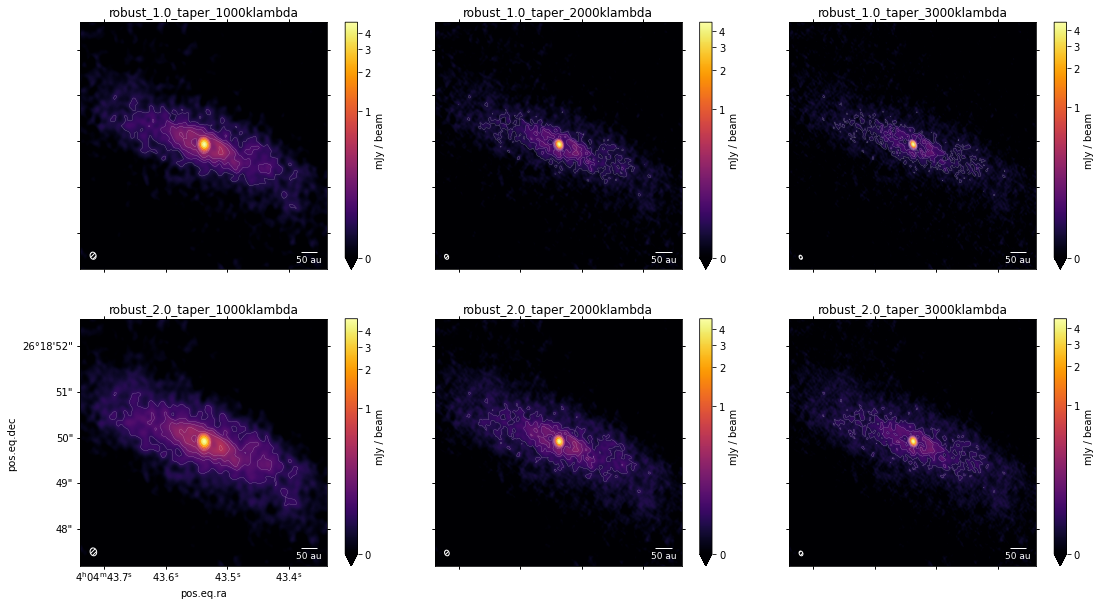

In [21]:
fig = plt.figure(figsize=(18, 10))
print(imaging_params[6:])
for i, imaging_param_str in enumerate(imaging_params[6:]): # only for robust
    imagepath = prefix + imaging_param_str + ext
    header = fits.getheader(imagepath)
    beam = (header['BMAJ']/np.abs(header['CDELT1']), header['BMIN']/np.abs(header['CDELT1']), 90+header['BPA'])
    scale = (50 / 140 / 3600 / header['CDELT1'], '50 au')
    data = fits.getdata(imagepath)[2100:3900,2100:3900] * 1e3 # to mJy
    norm = ImageNormalize(data, vmin=0.0, stretch=AsinhStretch(a=0.03))
    levels = np.array([3, 5, 7, 10, 15, 20, 30, 50, 100, 150, 200]) * stat.at[imaging_param_str, 'rms [mJy / beam]']
    imshow_kw = {'norm': norm, 'cmap': 'inferno'}
    contour_kw = {'levels': levels, "colors": "white", "linewidths": 0.2, "linestyles": "dashed"}
    ax = fig.add_subplot(2, 3, i+1, projection=WCS(header))
    #fig, ax = plt.subplots(subplot_kw={'projection': WCS(header)})
    plot_2D_map(data, ax=ax, beam=beam, scale=scale, imshow_kw=imshow_kw, contour_kw=contour_kw, cbar_kw={'label': 'mJy / beam'})
    ax.set(title=imaging_param_str)
    if i != 3:
        ax.tick_params(axis="x", labelbottom=False)  # remove ticklabels for visual clarity
        ax.tick_params(axis="y", labelleft=False)

In [22]:
fig.savefig("./L1489IRS_continuum_gallery_uvtaper.pdf", bbox_inches='tight', pad_inches=0.01)